# CMPS 3160 Final Project  
## Modeling player stats and salaries by season/year for NHL, NBA, and NFL
### By: Ryan Stevens, Alex Olteanu  
#### Github.io: https://stevensryanw.github.io
#### GitHub: https://github.com/stevensryanw/stevensryanw.github.io

### Introduction  

In this project we will be creating our own datasets through merging datasets from multiple online sources. The datasets we will be using are from the National Hockey League (NHL), National Basketball Association (NBA), and the National Football League (NFL). For each league we have created a dataset that contains the statistics of each player in the league, and a dataset that contains the salaries of each player in the league. We will be using these datasets to create a model that will predict the salary of a player based on their statistics. In adition to this, we will be using the datasets to create a model that will predict the salary of a player based on the statistics of the players on their team. Another question we will be answering is which league has the highest average salary. Additionally, we will be answering the question of which league has the highest average salary for a player based on their position. 

We would also like to create multiple heat maps and graphs showing the correlation between salary and location. I would like to find if any location has higher salaries in any of the leagues. I would also like to find if any location has higher salaries for a specific position in any of the leagues. Moreover, since our data sets are currently so large this poses a very interesting question of what is the best way to tackle all of this information. Given the dozens of measures available to describe an athlete statistically, this means that there is a fairly large combination of different metrics and their correlation. We believe that we will first have to investing our most promising leads, as well as any hunches we may feel inclined to act on. Thankfully, using Pandas we are able to compare vast numbers of variables at a glance so this is one route we are willing to entertain. The leads were are searching for however, to be specific, are any relationships that may help us answer the question mentioned above. 

In [322]:
#Importing numpy and pandas
import numpy as np
import pandas as pd
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
#import seaborn as sns
#import sklearn

## Data Initialization
Some of our data still has NaN values, we plan to fix this when we begin modeling the data and find the best way to fill in the NaN values. We will also be removing any rows that have NaN values in the salary column. We will be using the following libraries for our project: Pandas, Numpy, Matplotlib, Seaborn, and Sklearn.

### NHL Data Initializations
The first dataset we will be using is the NHL player statistics dataset. This dataset contains the statistics of players in the NHL from the 1940-2018 season. The dataset was found at http://inalitic.com/datasets/nhl%20player%20data.html

The second dataset we will be using is the NHL player salaries dataset. This dataset contains the salaries of players in the NHL from the 2000-2018 season. The dataset was found using a web scraper I made. The scraped website is https://www.hockeyzoneplus.com

The NaNs in the final dataset are due to combining the goalies and skaters datasets, we can fix them using averages during the modeling process.

Player names are not unique but we can use both player name and year to make them unique.

#### NHL Skater and Goalie Stats Initialization with some cleaning

In [323]:
#Creating a dataframe from csv files
#This is the data of the 1940-2020 nhl skaters
nhlSkaters = pd.read_csv('data/nhl/skater_data/skater_stats.csv', encoding='unicode_escape')

#This is the data of the 2008-2020 nhl goalies
nhlGoalies = pd.read_csv('data/nhl/goalie_data/nhl_goalie_stats.csv')

#Data cleanup
#Removing years before 2000 and after 2018
nhlSkaters.drop(nhlSkaters[nhlSkaters['Season'] < 2000].index, inplace=True)
nhlGoalies.drop(nhlGoalies[nhlGoalies['SEASON'] < 2000].index, inplace=True)
nhlSkaters.drop(nhlSkaters[nhlSkaters['Season'] > 2018].index, inplace=True)
nhlGoalies.drop(nhlGoalies[nhlGoalies['SEASON'] > 2018].index, inplace=True)

#Adding a Pos column to the nhlGoalies dataframe
nhlGoalies['Pos'] = 'G'

#Matching data headers for merging later on
nhlSkaters.rename(columns={'Season':'Year', 'Player':'Name', 'Tm': 'Team'}, inplace=True)
nhlGoalies.rename(columns={'PLAYER_NAME': 'Name', 'SEASON': 'Year', 'TM': 'Team', 'AGE': 'Age'}, inplace=True)

#Droping columns that are not needed
nhlSkaters.drop(columns = ['Unnamed: 0'], inplace = True)
nhlGoalies.drop(columns = ['PLAYER_ID', 'LG'], inplace = True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [324]:
#Output the skater dataframe
nhlSkaters

,Year,Name,Age,Team,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15807,2000,Teemu Selanne,29.0,MDA,RW,79,33,0.4177,52,85,...,-,236,14,"1,795",22:44,NaN,NaN,NaN,NaN,NaN
15808,2000,Paul Kariya,25.0,MDA,LW,74,42,0.5676,44,86,...,-,324,13,"1,803",0:22,NaN,NaN,NaN,NaN,NaN
15809,2000,Mark Recchi,31.0,PHI,RW,82,28,0.3415,63,91,...,1,223,13,"1,781",21:43,NaN,NaN,NaN,NaN,NaN
15810,2000,Pavel Bure*,28.0,FLA,RW,74,58,0.7838,36,94,...,-,360,16,"1,804",0:23,NaN,NaN,NaN,NaN,NaN


In [325]:
#Output the goalie dataframe
nhlGoalies

,Year,Name,Age,Team,GP,GS,W,L,T/O,GA,...,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM,Pos
2720,2000,Jean-Sebastien Aubin,22,PIT,51,NaN,23.0,21.0,3.0,120,...,NaN,NaN,NaN,90.0,13.09,0,1.0,1.0,2.0,G
2721,2000,Tom Barrasso,34,PIT,18,NaN,5.0,7.0,2.0,46,...,NaN,NaN,NaN,125.0,-9.10,0,0.0,0.0,6.0,G
2722,2000,Tom Barrasso,34,OTT,7,NaN,3.0,4.0,0.0,22,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,G
2723,2000,Ed Belfour,34,DAL,62,NaN,32.0,21.0,7.0,127,...,NaN,NaN,NaN,85.0,23.20,0,3.0,3.0,10.0,G
2724,2000,Zac Bierk,23,TBL,12,NaN,4.0,4.0,1.0,31,...,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,0.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2018,Semyon Varlamov,29,COL,51,47.0,24.0,16.0,6.0,128,...,28.0,0.596,5.0,91.0,11.99,0,0.0,0.0,2.0,G
4421,2018,Andrei Vasilevskiy,23,TBL,65,64.0,44.0,17.0,3.0,167,...,36.0,0.563,8.0,92.0,15.12,0,2.0,2.0,14.0,G
4422,2018,Cam Ward,33,CAR,43,42.0,23.0,14.0,4.0,112,...,21.0,0.500,10.0,108.0,-7.82,0,0.0,0.0,14.0,G
4423,2018,Scott Wedgewood,25,ARI,20,17.0,5.0,9.0,4.0,63,...,7.0,0.412,4.0,122.0,-11.48,0,0.0,0.0,2.0,G


#### Creating a dataframe with just the skater and goalie names in order to webscrape for salary data

In [326]:
#Creating a dataframe with just the goalie names
goalieNameSeason = nhlGoalies[['Name']]
goalieNameSeason

#Creating a dataframe with just the skater names
skaterNameSeason = nhlSkaters[['Name']]
skaterNameSeason

#Merging the skater and goalie names into one dataframe
nhlName = pd.concat([skaterNameSeason, goalieNameSeason], ignore_index=True)

#Making sure there are no duplicates
nhlName = nhlName.drop_duplicates()

#Output the dataframe
nhlName

,Name
0,Justin Abdelkader
1,Pontus Aberg
2,Noel Acciari
3,Kenny Agostino
4,Sebastian Aho
...,...
17456,Adin Hill
17471,Maxime Lagace
17478,Alex Lyon
17504,Harri Sateri


#### Output datasets to csv files

In [327]:
#Output the dataframes created to csv
nhlSkaters.to_csv('data/nhl/skater_data/nhlSkaters.csv')
nhlGoalies.to_csv('data/nhl/goalie_data/nhlGoalies.csv')
nhlName.to_csv('webscrapers/nhlName.csv', index=False, header=False)

#### NHL Salary Web Scraper

In [328]:
#Running the webscraper to get the salary data
#Website: https://www.hockeyzoneplus.com
#This takes about a day to run, so have it commented unless needed

#%env
#Will need to install the needed packages (just uncomment them)
#%pip install requests
#%pip install bs4
#%pip install lxml

#Will need to change to the correct directory of your computer
#%run /Users/ryanstevens/Documents/GitHub/CMPS-3160-Final-Project/webscrapers/nhlSalary.py

#### NHL Salary Data Initialization, Cleaning, and Merging

In [329]:
#Read in the salary csv file
nhlSalary = pd.read_csv('data/nhl/salary_data/salariesFinal.csv')

#Remove years before 2000 and after 2018
nhlSalary.drop(nhlSalary[nhlSalary['Year'] < 2000].index, inplace=True)
nhlSalary.drop(nhlSalary[nhlSalary['Year'] > 2018].index, inplace=True)

#Meging the salary dataframe with the skater and goalie dataframe
nhlSkaterSal =  nhlSkaters.merge(nhlSalary, on=['Name', 'Year'], how='left')
nhlGoalieSal =  nhlGoalies.merge(nhlSalary, on=['Name', 'Year'], how='left')

#Output the dataframes to csv
nhlSkaterSal.to_csv('data/nhl/skater_data/nhlSkaterSal.csv')
nhlGoalieSal.to_csv('data/nhl/goalie_data/nhlGoalieSal.csv')

#Print the dataframe
nhlGoalieSal
nhlSkaterSal

#Merge the skaterSal and goalieSal dataframes
nhl = pd.concat([nhlSkaterSal, nhlGoalieSal], ignore_index=True)

#Example of finding skaters and golies from the newly merged dataframe
skaters = nhl[nhl['Pos']!='G']
goalies = nhl[nhl['Pos']=='G']

#Remove rows with empty salary values
nhl.dropna(subset=['Salary'], inplace=True)

#Sort by year then name
nhl.sort_values(by=['Year', 'Name'], inplace=True)

#Output the dataframe to csv
nhl.to_csv('data/nhl/nhl.csv')

#### NHL Data Description
- **Year**: The year the player played in
- **Name**: The name of the player
- **Age**: Players age that season
- **Team**: The team the player was playing for
- **Pos**: The position the player played
- **GP**: Games played in that season
- **G**: Goals scored in that season
- **GPG**: Average goals per game in that season
- **A**: Assists in that season
- **PTS**: Points in that season (G+A)
- **+/-**: Plus/Minus in that season
- **PIM**: Penalty Minutes in that season
- **EVG**: Even Strength Goals in that season
- **PPG**: Power Play Goals in that season
- **SHG**: Short Handed Goals in that season
- **GWG**: Game Winning Goals in that season
- **EVA**: Even Strength Assists in that season
- **PPA**: Power Play Assists in that season
- **SHA**: Short Handed Assists in that season
- **S**: Shots in that season
- **S%**: Shooting Percentage in that season
- **TOI**: Time on Ice in that season
- **ATOI**: Average Time on Ice in that season
- **BLK**: Blocks in that season
- **HIT**: Hits in that season
- **FOwin**: Faceoffs Won in that season
- **FOloss**: Faceoffs Lost in that season
- **FO%**: Faceoff Percentage in that season
- **Salary**: Salary for that season
- **GS**: Games started in that season
- **W**: Wins in that season
- **L**: Losses in that season
- **T**: Ties/Overtime in that season
- **GA**: Goals Against in that season
- **SA**: Shots Against in that season
- **SV**: Saves in that season
- **SV%**: Save Percentage in that season
- **GAA**: Goals Against Average in that season
- **SO**: Shutouts in that season
- **GPS**: Goalie point shares in that season
- **MIN**: Minutes in that season
- **QS**: Quality starts in that season
- **QS%**: Quality start percentage in that season
- **RBS**: Rebound saves in that season
- **GA%**: Goals against percentage in that season
- **GSAA**: Goalie save above average in that season

In [330]:
#Output nfl
nhl

,Year,Name,Age,Team,Pos,GP,G,GPG,A,PTS,...,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA
15397,2000,Aaron Gavey,25.0,DAL,C,41,7,0.1707,6,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15297,2000,Aaron Miller,28.0,COL,D,53,1,0.0189,7,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15196,2000,Aaron Ward,27.0,DET,D,36,1,0.0278,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15288,2000,Adam Burt,31.0,PHI,D,67,1,0.0149,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15705,2000,Adam Deadmarsh,24.0,COL,RW,71,18,0.2535,27,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2018,Zack Kassian,27.0,EDM,RW,74,7,0.0946,12,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,2018,Zack Mitchell,25.0,MIN,RW,23,3,0.1304,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,2018,Zack Smith,29.0,OTT,LW,68,5,0.0735,14,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2018,Zdeno Chara,40.0,BOS,D,73,7,0.0959,17,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NFL Data Initializations
The first dataset we will be using is the NFL player statistics dataset. This dataset contains the statistics of players in the NFL from the 2000-2018 season. The dataset was found at https://www.kaggle.com/datasets/kendallgillies/nflstatistics?resource=download

The second dataset we will be using is the NFL player salaries dataset. This dataset contains the salaries of players in the NFL from the 2000-2019 season. The dataset was found using a web scraper I made. The scraped website is https://overthecap.com

When we begin modeling we may need to change the NaN values in the final dataset to means, modes, or medians. Additionally we may have to separate players based on position so that we can zscore the data and create a player performance score based on their position. Once we have a performance scores for each player we can use that to predict their salary or future performance.

#### NFL Stats Initializations

In [331]:
#Read in stats data of each type
nfl_defensive = pd.read_csv("data/nfl/stats/Career_Stats_Defensive.csv")
nfl_field_goal = pd.read_csv("data/nfl/stats/Career_Stats_Field_Goal_Kickers.csv")
nfl_fumble = pd.read_csv("data/nfl/stats/Career_Stats_Fumbles.csv")
nfl_kick_return = pd.read_csv("data/nfl/stats/Career_Stats_Kick_Return.csv")
nfl_kickoff = pd.read_csv("data/nfl/stats/Career_Stats_Kickoff.csv")
nfl_passing = pd.read_csv("data/nfl/stats/Career_Stats_Passing.csv")
nfl_punt_return = pd.read_csv("data/nfl/stats/Career_Stats_Punt_Return.csv")
nfl_punting = pd.read_csv("data/nfl/stats/Career_Stats_Punting.csv")
nfl_receiving = pd.read_csv("data/nfl/stats/Career_Stats_Receiving.csv")
nfl_rushing = pd.read_csv("data/nfl/stats/Career_Stats_Rushing.csv")

#### NFL Stats Cleaning

In [332]:
#Method to clean up the all of the stats dataframes
def cleanData(data):
    #Remove unnecessary columns
    data.drop(columns=['Player Id'], inplace=True)
    #Fix name values
    temp = data['Name'].str.split(',')
    data['Name'] = temp.str[1] + ' ' + temp.str[0]
    #Drop years before 2000
    data.drop(data[data['Year'] <= 2000].index, inplace=True)
    #Sort by year
    data.sort_values('Year', inplace=True)
    #Drop rows with na for position
    data.dropna(subset=['Position'], inplace=True)

#Array with all dataframe names that need to be cleaned
dataToClean = [nfl_receiving, nfl_passing, nfl_rushing, nfl_defensive, nfl_fumble, nfl_field_goal, nfl_kick_return, nfl_kickoff, nfl_punt_return, nfl_punting]

#Loop for cleaning data
for i in dataToClean:
    cleanData(i)

#Output each dataframe to check the data
nfl_receiving
# nfl_passing
# nfl_rushing
# nfl_defensive
# nfl_fumble
# nfl_field_goal
# nfl_kick_return
# nfl_kickoff
# nfl_punt_return
# nfl_punting

,Name,Position,Year,Team,Games Played,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles
2160,Steve Smith,WR,2001,Carolina Panthers,15,10,154,15.4,10.3,33,0,2,0,8,0
1916,Drew Brees,QB,2001,San Diego Chargers,1,--,--,--,0.0,--,--,--,--,--,--
5665,Tom Brady,QB,2001,New England Patriots,15,1,23,23.0,1.5,23,0,1,0,1,0
5220,Shaun Hill,QB,2002,Minnesota Vikings,0,--,--,--,0.0,--,--,--,--,--,--
6186,Josh McCown,QB,2002,Arizona Cardinals,2,--,--,--,0.0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,Adrian Peterson,RB,2016,Minnesota Vikings,3,3,8,2.7,2.7,7,0,0,0,0,0
8654,Mike James,RB,2016,Tampa Bay Buccaneers,4,4,22,5.5,5.5,6,0,0,0,0,0
10171,Jeremy Butler,WR,2016,San Diego Chargers,4,2,11,5.5,2.8,6,0,0,0,0,0
3494,Antonio Brown,WR,2016,Pittsburgh Steelers,15,106,"1,284",12.1,85.6,51,12,22,3,64,0


#### Merging of all the NFL data with some cleaning

In [333]:
#Merge each data set using outer merge on Name, Year, Position, Team, and Games Played
nflStats = pd.merge(nfl_passing, nfl_receiving, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats.rename(columns={'Fumbles': 'Receiving Fumbles'}, inplace=True)
nflStats = pd.merge(nflStats, nfl_rushing, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats.rename(columns={'Fumbles': 'Rushing Fumbles'}, inplace=True)
nflStats = pd.merge(nflStats, nfl_defensive, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_fumble, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_field_goal, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_kick_return, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_kickoff, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_punt_return, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')
nflStats = pd.merge(nflStats, nfl_punting, on=['Name', 'Year', 'Position', 'Team', 'Games Played'], how='outer')

#Drop duplicate names and years
nflStats.drop_duplicates(subset=['Name', 'Year'], inplace=True)

#Drop na position values
nflStats.dropna(subset=['Position'], inplace=True)

#Sort by year
nflStats.sort_values('Year', inplace=True)

#Fix name values
nflStats.Name = nflStats.Name.str[1:]

#Output stats to csv
nflStats.to_csv("data/nfl/stats/nflStats.csv")

In [334]:
#Output stats
nflStats

,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,...,Net Punting Average,Punts Blocked,Out of Bounds Punts,Downed Punts,Punts Inside 20 Yard Line,Touchbacks,Fair Catches,Punts Returned,Yards Returned on Punts,TDs Returned on Punt
0,Shane Lechler,P,2001,Oakland Raiders,16,--,--,--,0.0,--,...,35.6,1,16,6,23,12,5,34,502,0
1,Drew Brees,QB,2001,San Diego Chargers,1,27,15,55.6,27.0,221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Steve Smith,WR,2001,Carolina Panthers,15,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Brady,QB,2001,New England Patriots,15,413,264,63.9,27.5,"2,843",...,--,--,--,--,--,--,--,--,--,--
4,Adam Vinatieri,K,2001,New England Patriots,16,--,--,--,0.0,--,...,33.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,Arrelious Benn,WR,2016,Jacksonville Jaguars,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2802,Ben Braunecker,TE,2016,Chicago Bears,13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2801,Davante Adams,WR,2016,Green Bay Packers,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2772,Roosevelt Nix-Jones,FB,2016,Pittsburgh Steelers,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### NFL Salary Web Scraper

In [335]:
#Running the webscraper to get the salary data
#Website: https://overthecap.com
#This takes about a day to run, so have it commented unless needed

#%env
#Will need to install the needed packages (just uncomment them)
#%pip install requests
#%pip install bs4
#%pip install lxml

#Will need to change to the correct directory of your computer
#%run /Users/ryanstevens/Documents/GitHub/CMPS-3160-Final-Project/webscrapers/nflSalary.py

#### Salary Data Inizialization and Cleaning

In [336]:
#Read in salary csv
nflSalary = pd.read_csv('data/nfl/player_salaries/salaries.csv')

#Drop years before 2000 and after 2019
nflSalary.drop(nflSalary[nflSalary['Year'] > 2019].index, inplace=True)
nflSalary.drop(nflSalary[nflSalary['Year'] < 2000].index, inplace=True)

#Drop 0 salary values
nflSalary.drop(nflSalary[nflSalary['Salary'] == 0].index, inplace=True)

#Sort by year
nflSalary.sort_values('Year', inplace=True)

#Output salary to csv
nflSalary.to_csv("data/nfl/player_salaries/nflSalary.csv")

#Remove players with no salary data
drop = nflSalary.loc[nflSalary.Salary == '0']
drop.index
nflSalary.drop(axis=0, index = p.index, inplace = True)
nflSalary

#Output salary
nflSalary

,Name,Year,Salary
2,Peyton Manning,2000,11066000
28299,Jake Plummer,2000,3030000
26124,John Randle,2000,5000000
26111,Levon Kirkland,2000,4525000
28316,Shannon Sharpe,2000,5000000
...,...,...,...
23973,Kolton Miller,2019,1092332
16767,Bud Dupree,2019,9232000
23981,Tremaine Edmunds,2019,1055434
24057,Terrell Edmunds,2019,966263


#### Merging the NFL Stats and Salary Data

In [337]:
#Merge the salary and stats dataframes
nfl = pd.merge(nflStats, nflSalary)

#Output nfl to csv
nfl.to_csv("data/nfl/nfl.csv")

#### NFL Data Description

##### All
- **Name**: The name of the player
- **Position**: The position the player played
- **Year**: The year the player played in
- **Team**: The team the player was playing for
- **Games Played**: Games played in that season
- **Salary**: Salary for that season
##### Passing
- **Passes Attempted**: Passes attempted in that season
- **Passes Completed**: Passes completed in that season
- **Completion Percentage**: Completion percentage in that season
- **Pass Attempts Per Game**: Pass attempts per game in that season
- **Passing Yards**: Passing yards in that season
- **Passing Yards Per Attempt**: Passing yards per attempt in that season
- **Passing Yards Per Game**: Passing yards per game in that season
- **TD Passes**: Touchdown passes in that season
- **Percentage of TDs per Attempts**: Percentage of touchdowns per attempt in that season
- **Ints_x**: Passing interceptions in that season
- **Int Rate**: Interception rate in that season
- **Longest Pass**: Longest pass in that season
- **Passes Longer than 20 Yards**: Passes per game in that season
- **Passes Longer than 40 Yards**: Passes longer than 40 yards in that season
- **Sacks_x**: Sacks in that season
- **Sack Yards Lost**: Sack yards lost in that season
- **Passer Rating**: Passer rating in that season
##### Recieving
- **Receptions**: Receptions in that season
- **Receiving Yards**: Receiving yards in that season
- **Yards Per Reception**: Receiving yards per reception in that season
- **Yards Per Game**: Receiving yards per game in that season
- **Longest Reception**: Longest reception in that season
- **Recieving TDs**: Receiving touchdowns in that season
- **Receptions Longer than 20 Yards**: Receptions longer than 20 yards in that season
- **Receptions Longer than 40 Yards**: Receptions longer than 40 yards in that season
- **First Down Receptions**: First down receptions in that season
- **Recieving Fumbles**: Receiving fumbles in that season
##### Running
- **Rushing Attempts**: Rushing attempts in that season
- **Rushing Attempts Per Game**: Rushing attempts per game in that season
- **Rushing Yards**: Rushing yards in that season
- **Yards Per Carry**: Yards per carry in that season
- **Rushing Yards Per Game**: Rushing yards per game in that season
- **Rushing TDs**: Rushing touchdowns in that season
- **Longest Rushing Run**: Longest rush in that season
- **Rushing First Downs**: Rushing first downs in that season
- **Percentage of Rushing First Downs**: Percentage of rushing first downs in that season
- **Rushing More Than 20 Yards**: Rushing more than 20 yards in that season
- **Rushing More Than 40 Yards**: Rushing more than 40 yards in that season
- **Rushing Fumbles**: Rushing fumbles in that season
##### Defensive
- **Total Tackles**: Tackles in that season
- **Solo Tackles**: Solo tackles in that season
- **Assisted Tackles**: Assisted tackles in that season
- **Sacks_y**: Sacks in that season
- **Safeties**: Safeties in that season
- **Passes Defended**: Passes defended in that season
- **Int_y**: Interceptions in that season
- **Ints for TDs**: Interceptions for touchdowns in that season
- **Int Yards**: Interception yards in that season
- **Yards Per Int**: Yards per interception in that season
- **Longest Int Return**: Longest interception in that season
##### Fumbles
- **Fumbles_x**: Fumbles in that season
- **Fumbles Lost**: Fumbles lost in that season
- **Forced Fumbles**: Fumbles forced in that season
- **Own Fumbles Recovered**: Fumbles recovered in that season
- **Opponent Fumbles Recovered**: Opponent fumbles recovered in that season
- **Own Fumble Return Yards**: Fumble return yards in that season
- **Opponent Fumble Return Yards**: Opponent fumble return yards in that season
- **Fumble Return TDs**: Fumble return touchdowns in that season
- **Out of Bounds Fumbles**: Out of bounds fumbles in that season
- **Saftey Fumbles**: Safety fumbles in that season
- **Touchbacks_x**: Touchbacks in that season
##### Feild Goals
- **Kicks Blocked**: Kicks blocked in that season
- **Longest FG Made**: Longest field goal made in that season
- **FGs Made**: Field goals made in that season
- **FGs Attempted**: Field goals attempted in that season
- **FG Percentage**: Field goal percentage in that season
- **FGs Made 20-29 Yards**: Field goals made 20-29 yards in that season
- **FGs Attempted 20-29 Yards**: Field goals attempted 20-29 yards in that season
- **FG Percentage 20-29 Yards**: Field goal percentage 20-29 yards in that season
- **FGs Made 30-39 Yards**: Field goals made 30-39 yards in that season
- **FGs Attempted 30-39 Yards**: Field goals attempted 30-39 yards in that season
- **FG Percentage 30-39 Yards**: Field goal percentage 30-39 yards in that season
- **FGs Made 40-49 Yards**: Field goals made 40-49 yards in that season
- **FGs Attempted 40-49 Yards**: Field goals attempted 40-49 yards in that season
- **FG Percentage 40-49 Yards**: Field goal percentage 40-49 yards in that season
- **FGs Made 50+ Yards**: Field goals made 50+ yards in that season
- **FGs Attempted 50+ Yards**: Field goals attempted 50+ yards in that season
- **FG Percentage 50+ Yards**: Field goal percentage 50+ yards in that season
- **Extra Points Attempted**: Extra points attempted in that season
- **Extra Points Made**: Extra points made in that season
- **Percentage of Extra Points Made**: Extra point percentage in that season
- **Extra Points Blocked**: Extra points blocked in that season
##### Kick Returns
- **Returns_x**: Kick returns in that season
- **Yards Returned_x**: Kick return yards in that season
- **Yards Per Return_x**: Kick return yards per return in that season
- **Longest Return_x**: Longest kick return in that season
- **Returns for TDs_x**: Kick returns for touchdowns in that season
- **Returns Longer than 20 Yards_x**: Kick returns longer than 20 yards in that season
- **Returns Longer than 40 Yards_x**: Kick returns longer than 40 yards in that season
- **Fair Catches_x**: Fair catches in that season
- **Fumbles_y**: Fumbles in that season
##### Kicking
- **Kickoffs**: Kickoffs in that season
- **Kickoff Yards**: Kickoff yards in that season
- **Out of Bounds Kickoffs**: Out of bounds kickoffs in that season
- **Yards Per Kickoff**: Kickoff yards per kickoff in that season
- **Touchbacks_y**: Touchbacks in that season
- **Touchback Percentage**: Touchback percentage in that season
- **Kickoffs Returned**: Kickoffs returned in that season
- **Average Returned Yards**: Average kickoff return in that season
- **Kickoffs Resulting in TDs**: Kickoffs resulting in touchdowns in that season
- **On Side Kicks**: On side kicks in that season
- **On Side Kick Returned**: On side kicks returned in that season
##### Punt Returns
- **Returns_y**: Punt returns in that season
- **Yards Returned_y**: Punt return yards in that season
- **Yards Per Return_y**: Punt return yards per return in that season
- **Longest Return_y**: Longest punt return in that season
- **Returns for TDs_y**: Punt returns for touchdowns in that season
- **Returns Longer than 20 Yards_y**: Punt returns longer than 20 yards in that season
- **Returns Longer than 40 Yards_y**: Punt returns longer than 40 yards in that season
- **Fair Catches_y**: Fair catches in that season
- **Fumbles**: Fumbles in that season
##### Punting
- **Punts**: Punts in that season
- **Gross Punting Yards**: Gross punting yards in that season
- **Net Punting Yards**: Net punting yards in that season
- **Longest Punt**: Longest punt in that season
- **Gross Punting Average**: Gross punting average in that season
- **Net Punting Average**: Net punting average in that season
- **Punts Blocked**: Punts blocked in that season
- **Out of Bounds Punts**: Out of bounds punts in that season
- **Downed Punts**: Downed punts in that season
- **Punts Inside 20 Yard Line**: Punts inside the 20 yard line in that season
- ** Touchbacks**: Touchbacks in that season
- **Fair Catches**: Fair catches in that season
- **Punts Returned**: Punts returned in that season
- **Yards Returned on Punts**: Punt return yards in that season
- **TDs Returned on Punts**: Punt return touchdowns in that season

In [338]:
#Output nfl
nfl

,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,...,Punts Blocked,Out of Bounds Punts,Downed Punts,Punts Inside 20 Yard Line,Touchbacks,Fair Catches,Punts Returned,Yards Returned on Punts,TDs Returned on Punt,Salary
0,Shane Lechler,P,2001,Oakland Raiders,16,--,--,--,0.0,--,...,1,16,6,23,12,5,34,502,0,298000
1,Drew Brees,QB,2001,San Diego Chargers,1,27,15,55.6,27.0,221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2165000
2,Steve Smith,WR,2001,Carolina Panthers,15,--,--,--,0.0,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709000
3,Tom Brady,QB,2001,New England Patriots,15,413,264,63.9,27.5,"2,843",...,--,--,--,--,--,--,--,--,--,328000
4,Adam Vinatieri,K,2001,New England Patriots,16,--,--,--,0.0,--,...,0,0,1,1,0,0,0,0,0,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6558,Theo Riddick,RB,2016,Detroit Lions,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4650000
6559,Arrelious Benn,WR,2016,Jacksonville Jaguars,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675000
6560,Ben Braunecker,TE,2016,Chicago Bears,13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370588
6561,Davante Adams,WR,2016,Green Bay Packers,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777582


### NBA Data Initializations
The first dataset we will be using is the NBA player statistics dataset. This dataset contains the statistics of players in the NFL from the 1950-2021 season. The dataset was found at https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=player_data.csv

The second dataset we will be using is the NBA player strategy dataset. This dataset contains the statistics of players in the NFL from the 2000-2020 season. The dataset was found at https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv

It seems that the massive spike in average player salary in 2003 may be due to data quality. It is possible that are missing data from the 2003 season. 

#### Creating the dataframe

In [339]:
#Creating dataframes from the csv files

#This is the data of 2000-2020 nba player salaries
nba_salaries = pd.read_csv('data/nba/player_salaries/nba-salaries.csv')

#This is the data of 2000-2020 nba player stats
nba_season = pd.read_csv('data/nba/stats/nba_season.csv')

#Matching dataframe column names
nba_season.rename(columns = {'Player':'Name', 'Year':'Season', 'Tm':'Team'}, inplace = True)
nba_salaries.rename(columns = {'season':'Season', 'name': 'Name', 'team': 'Team', 'position': 'Pos', 'salary': 'Salary'}, inplace = True)

#Removing broken values
nba_season.drop(columns = ['Unnamed: 0'], inplace = True)

#Clean out years greater than 2000 and less than 2017
def cleanYearGreater(data, year):
    return data[data['Season'] >= year]

def cleanyearLess(data, year):
    return data[data['Season'] <= year]

nba_season = cleanyearLess(nba_season, 2017)
nba_season = cleanYearGreater(nba_season, 2000)
nba_salaries = cleanyearLess(nba_salaries, 2017)
nba_salaries = cleanYearGreater(nba_salaries, 2000)

#Fixing player team data from abbreviations to full names
nba_abbrevs = {'BOS': 'Boston Celtics', 'BRK': 'Brooklyn Nets', 'NYK': 'New York Knicks', 'PHI': 'Philadelphia 76ers', 'TOR': 'Toronto Raptors',
                 'CHI': 'Chicago Bulls', 'CLE': 'Cleveland Cavaliers', 'DET': 'Detroit Pistons', 'IND': 'Indiana Pacers', 'MIL': 'Milwaukee Bucks', 
                 'ATL': 'Atlanta Hawks', 'CHA': 'Charlotte Hornets', 'MIA': 'Miami Heat', 'ORL': 'Orlando Magic', 'WAS': 'Washington Wizards', 
                 'DEN': 'Denver Nuggets', 'MIN': 'Minnesota Timberwolves', 'OKC': 'Oklahoma City Thunder', 'POR': 'Portland Trail Blazers', 
                 'UTA': 'Utah Jazz', 'GSW': 'Golden State Warriors', 'LAC': 'Los Angeles Clippers', 'LAL': 'Los Angeles Lakers', 'PHO': 'Phoenix Suns', 
                 'SAC': 'Sacramento Kings', 'DAL': 'Dallas Mavericks', 'HOU': 'Houston Rockets', 'MEM': 'Memphis Grizzlies', 'NOP': 'New Orleans Pelicans', 
                 'SAS': 'San Antonio Spurs', 'VAN': 'Vancouver Grizzlies', 'TOT': 'Two other teams', 'CHO': 'Charlotte Hornets', 'NJN': 'New Jersey Nets', 
                 'SEA': 'Seattle SuperSonics', 'CHH': 'Charlotte Hornets'}

#Function to replace team abbreviations with full names
def cleanTeam(data, teams):
    for i in data['Team']:
        for j in teams:
            if i == j:
                data['Team'].replace(i, nba_abbrevs[j], inplace=True)

cleanTeam(nba_season, nba_abbrevs)

#Making a salary dataframe without rank, team, and position for merging
nba_salMerge = nba_salaries
nba_salMerge.drop(columns = ['rank', 'Team', 'Pos'], inplace = True)
nba_salMerge

#Now we can merge the two dataframes using the name and season column
nba = nba_season.merge(nba_salMerge, on=['Name', 'Season'], how='left')

#Fixing year values by subtracting 1 from each rows season value
nba['Season'] = nba['Season'] - 1

#Dropping rows with null values for salary
nba.dropna(subset = ['Salary'], inplace = True)

#Dropping unused columns
nba.drop(columns = ['blanl', 'blank2'], inplace = True)

#Converting season to int
nba['Season'] = nba['Season'].astype(int)

#Output to csv
nba.to_csv('data/nba/nba.csv')

#### NBA Data Description
- **Season**: The year the player played in
- **Name**: The name of the player
- **Pos**: The position the player played
- **Age**: Players age that season
- **Team**: The team the player was playing for
- **G**: Games played in that season
- **GS**: Games started in that season
- **MP**: Minutes played in that season
- **PER**: Player Efficiency Rating in that season
- **TS%**: True Shooting Percentage in that season
- **3PAr**: 3 Point Attempt Rate in that season
- **FTr**: Free Throw Attempt Rate in that season
- **ORB%**: Offensive Rebound Percentage in that season
- **DRB%**: Defensive Rebound Percentage in that season
- **TRB%**: Total Rebound Percentage in that season
- **AST%**: Assist Percentage in that season
- **STL%**: Steal Percentage in that season
- **BLK%**: Block Percentage in that season
- **TOV%**: Turnover Percentage in that season
- **USG%**: Usage Percentage in that season
- **OWS**: Offensive Win Shares in that season
- **DWS**: Defensive Win Shares in that season
- **WS**: Win Shares in that season
- **WS/48**: Win Shares per 48 minutes in that season
- **OBPM**: Offensive Box Plus/Minus in that season
- **DBPM**: Defensive Box Plus/Minus in that season
- **BPM**: Box Plus/Minus in that season
- **VORP**: Value Over Replacement Player in that season
- **FG**: Field Goals in that season
- **FGA**: Field Goal Attempts in that season
- **FG%**: Field Goal Percentage in that season
- **3P**: 3 Pointers in that season
- **3PA**: 3 Point Attempts in that season
- **3P%**: 3 Point Percentage in that season
- **2P**: 2 Pointers in that season
- **2PA**: 2 Point Attempts in that season
- **2P%**: 2 Point Percentage in that season
- **eFG%**: Effective Field Goal Percentage in that season
- **FT**: Free Throws in that season
- **FTA**: Free Throw Attempts in that season
- **FT%**: Free Throw Percentage in that season
- **ORB**: Offensive Rebounds in that season
- **DRB**: Defensive Rebounds in that season
- **TRB**: Total Rebounds in that season
- **AST**: Assists in that season
- **STL**: Steals in that season
- **BLK**: Blocks in that season
- **TOV**: Turnovers in that season
- **PF**: Personal Fouls in that season
- **PTS**: Points in that season
- **Salary**: Salary for that season

In [340]:
#Output nba
nba

,Season,Name,Pos,Age,Team,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
3,1999,Shareef Abdur-Rahim,SF,23.0,Vancouver Grizzlies,82.0,82.0,3223.0,20.2,0.547,...,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0,9000000.0
5,1999,Ray Allen,SG,24.0,Milwaukee Bucks,82.0,82.0,3070.0,20.6,0.570,...,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0,9000000.0
6,1999,Rafer Alston,PG,23.0,Milwaukee Bucks,27.0,0.0,361.0,4.3,0.310,...,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0,301000.0
9,1999,Kenny Anderson,PG,29.0,Boston Celtics,82.0,82.0,2593.0,17.4,0.524,...,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0,6680000.0
11,1999,Shandon Anderson,SF,26.0,Houston Rockets,82.0,82.0,2700.0,13.8,0.567,...,91.0,293.0,384.0,239.0,96.0,32.0,194.0,182.0,1009.0,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10207,2016,Cody Zeller,PF,24.0,Charlotte Hornets,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,5318313.0
10208,2016,Tyler Zeller,C,27.0,Boston Celtics,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,8000000.0
10209,2016,Stephen Zimmerman,C,20.0,Orlando Magic,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,950000.0
10210,2016,Paul Zipser,SF,22.0,Chicago Bulls,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,750000.0


## Exploratory Data Analysis

### Graph of average salary each year per league

- **Title**: Average salary per year
- **Graph type**: Line graph
- **X-axis**: Year
- **Y-axis**: Average salary($)
- **Description**: This graph shows the average salary of each league per year.
- **Legend**: NHL, NBA, NFL


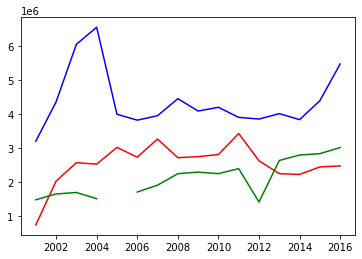

In [341]:
nflGraph = pd.DataFrame().assign(Name = nfl["Name"], Year = nfl["Year"], Salary = nfl["Salary"])
nflGraph.sort_values(by = "Year", ascending = True, inplace = True)
nflGraph = nflGraph.astype({"Year": "int", "Salary": "int"})

yearlyAvg = []
yearlyAvg.append(nflGraph.loc[nflGraph["Year"] == 2001].Salary.mean())

years = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

i = 2002
while i <= 2016:
    newAvg = pd.DataFrame()
    newAvg = nflGraph.loc[nflGraph["Year"] == i].Salary.mean()
    i += 1
    yearlyAvg.append(newAvg)

nflPlot = pd.DataFrame({"Year":years, "Salary":yearlyAvg})
nflPlot.Salary = nflPlot.Salary.round()

#Prep NBA Data
nbaGraph = nba.loc[nba["Season"] >= 2001]
nbaGraph = nbaGraph.loc[nbaGraph["Season"] <= 2016]
nbaGraph = pd.DataFrame().assign(Name = nbaGraph["Name"], Year = nbaGraph["Season"], Salary = nbaGraph["Salary"])
nbaGraph.sort_values(by = "Year", ascending = True, inplace = True)
nbaGraph = nbaGraph.astype({"Year": "int", "Salary": "int"})

yearlyAvg2 = []
yearlyAvg2.append(nbaGraph.loc[nbaGraph["Year"] == 2001].Salary.mean())

i = 2002
while i <= 2016:
    newAvg = pd.DataFrame()
    newAvg = nbaGraph.loc[nbaGraph["Year"] == i].Salary.mean()
    i += 1
    yearlyAvg2.append(newAvg)

nbaPlot = pd.DataFrame({"Year":years, "Salary":yearlyAvg2})
nbaPlot.Salary = nbaPlot.Salary.round()

#Prep NHL Data
nhlGraph = nhl.loc[nhl["Year"] >= 2001]
nhlGraph = nhlGraph.loc[nhlGraph["Year"] <= 2016]
nhlGraph = pd.DataFrame().assign(Name = nhlGraph["Name"], Year = nhlGraph["Year"], Salary = nhlGraph["Salary"])
nhlGraph.sort_values(by = "Year", ascending = True, inplace = True)
nhlGraph = nhlGraph.astype({"Year": "int", "Salary": "int"})

yearlyAvg3 = []
yearlyAvg3.append(nhlGraph.loc[nhlGraph["Year"] == 2001].Salary.mean())

i = 2002
while i <= 2016:
    newAvg = pd.DataFrame()
    newAvg = nhlGraph.loc[nhlGraph["Year"] == i].Salary.mean()
    i += 1
    yearlyAvg3.append(newAvg)

nhlPlot = pd.DataFrame({"Year":years, "Salary":yearlyAvg3})
nhlPlot.Salary = nhlPlot.Salary.round()

# #Plot the Data
plt.plot(nflPlot["Year"], nflPlot["Salary"], color = "Red")
plt.plot(nbaPlot["Year"], nbaPlot["Salary"], color = "Blue")
plt.plot(nhlPlot["Year"], nhlPlot["Salary"], color = "Green")
plt.show()

#### Comments on the graphs
We notice that the NBA consistently pays its athletes the highest salaries of any league. The NFL is second and the NHL is third. Furthermore, we notice a resoun dip in the salaries of NHL players from 2012. This reflects the real-world events taking place during the time.

### Graph of average salary by position each year per league

##### Separate graphs for each league
- **Title**: Average salary by position per year
- **Graph type**: Bar graph
- **X-axis**: Year
- **Y-axis**: Average salary($)
- **Description**: These graphs show the average salary of each position in each league per year.
- **Legend**: Each position in the league

Salary
Year Position           
2000  C        1165438.0
      C/LW     1025000.0
      D        1200082.0
      LW       1162188.0
      RW       1460204.0
...                  ...
2018  LW/RW    8200000.0
      RW       2710574.0
      RW/C     1250000.0
      RW/LW     875000.0
     G         2805114.0

[100 rows x 1 columns]

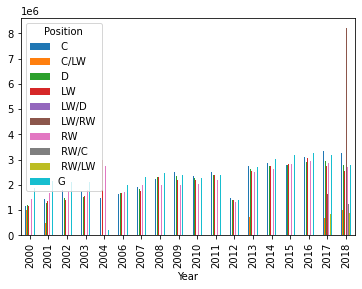

In [342]:
#NHL
nhlTemp = pd.DataFrame().assign(Name = nhl["Name"], Year = nhl["Year"], Position = nhl["Pos"], Salary = nhl["Salary"])
nhlTemp.sort_values(by = "Year", ascending = True, inplace = True)
nhlTemp = nhlTemp.astype({"Year": "int", "Salary": "int"})

nhl_cube = nhlTemp.pivot_table(index = "Year", columns=["Position"], values = "Salary", aggfunc=np.mean)
nhl_cube.plot.bar()

nhl_table = (nhlTemp.groupby(["Year", "Position"])).Salary.mean().round()
nhl_table.to_frame()


We notice that salary is fairly consistent among varying positions in the NHL.

Salary
Year Position           
2001 K          558833.0
     P          298000.0
     QB        1246500.0
     WR         709000.0
2002 DE        6904353.0
...                  ...
2016 RB        1464110.0
     SAF        291860.0
     SS        2422871.0
     TE        2055718.0
     WR        2318550.0

[244 rows x 1 columns]

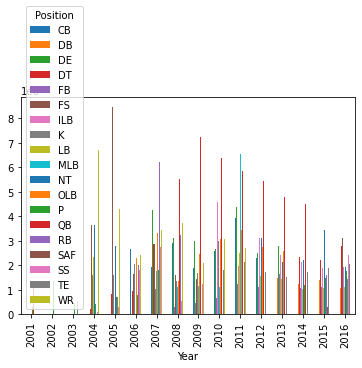

In [343]:
#NFL
nflTemp = pd.DataFrame().assign(Name = nfl["Name"], Year = nfl["Year"], Position = nfl["Position"], Salary = nfl["Salary"])
nflTemp.sort_values(by = "Year", ascending = True, inplace = True)
nflTemp = nflTemp.astype({"Year": "int", "Salary": "int"})

nfl_cube = nflTemp.pivot_table(index = "Year", columns=["Position"], values = "Salary", aggfunc=np.mean)
nfl_cube.plot.bar()

nfl_table = (nflTemp.groupby(["Year", "Position"])).Salary.mean().round()
nfl_table.to_frame()

We see that salary of a NFl player is highly dependent on the position played.

Salary
Year Position           
1999 C         4488677.0
     PF        5042781.0
     PG        3735148.0
     SF        2703636.0
     SG        3513292.0
...                  ...
2016 PF        5625808.0
     PF-C      1709719.0
     PG        5000585.0
     SF        5624772.0
     SG        4791897.0

[161 rows x 1 columns]

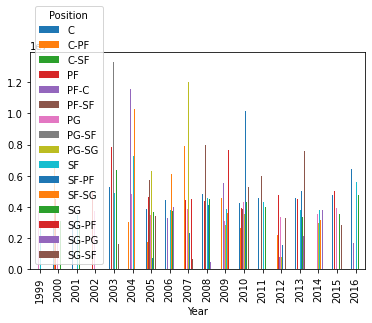

In [344]:
#NBA
nbaTemp = nba.loc[nba["Season"] >= 2001]
nbaTemp = nbaTemp.loc[nbaTemp["Season"] <= 2016]
nbaTemp = pd.DataFrame().assign(Name = nba["Name"], Year = nba["Season"], Position = nba["Pos"], Salary = nba["Salary"])
nbaTemp.sort_values(by = "Year", ascending = True, inplace = True)
nbaTemp = nbaTemp.astype({"Year": "int", "Salary": "int"})

nba_cube = nbaTemp.pivot_table(index = "Year", columns=["Position"], values = "Salary", aggfunc=np.mean)
nba_cube.plot.bar()

nba_table = (nbaTemp.groupby(["Year", "Position"])).Salary.mean().round()
nba_table.to_frame()

We see that salary highly varies among different positions in the NBA.

### Graph of average salary by team each year per league

##### Separate graphs for each league
- **Title**: Average salary by team per year
- **Graph type**: Bar graph
- **X-axis**: Year
- **Y-axis**: Average salary($)
- **Description**: These graphs show the average salary of each team in each league per year.
- **Legend**: Each team in the league

Salary
Year Team            
2000  ATL    680882.0
      BOS   1118828.0
      BUF    981206.0
      CAR   1131776.0
      CGY    933316.0
...               ...
2018 TOR    2216667.0
     VAN    2175000.0
     VEG    1680000.0
     WPG    2983333.0
     WSH    4175000.0

[1037 rows x 1 columns]

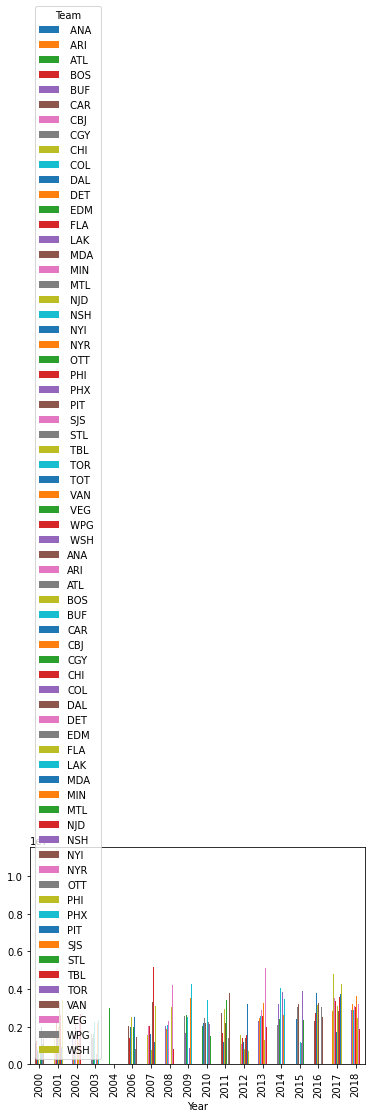

In [345]:
#NHL
nhlTemp = pd.DataFrame().assign(Name = nhl["Name"], Year = nhl["Year"], Team = nhl["Team"], Salary = nhl["Salary"])
nhlTemp.sort_values(by = "Year", ascending = True, inplace = True)
nhlTemp = nhlTemp.astype({"Year": "int", "Salary": "int"})

nhl_cube = nhlTemp.pivot_table(index = "Year", columns=["Team"], values = "Salary", aggfunc=np.mean)
nhl_cube.plot.bar()

nhl_table = (nhlTemp.groupby(["Year", "Team"])).Salary.mean().round()
nhl_table.to_frame()


There is a wide and clear range between the average salary of different teams in the NHL.

Salary
Year Team                           
2001 Carolina Panthers      709000.0
     Cleveland Browns       389000.0
     New England Patriots   489000.0
     Oakland Raiders        467750.0
     San Diego Chargers    2165000.0
...                              ...
2016 San Francisco 49ers   2133990.0
     Seattle Seahawks      2727249.0
     Tampa Bay Buccaneers  2401233.0
     Tennessee Titans      2236988.0
     Washington Redskins   2411496.0

[416 rows x 1 columns]

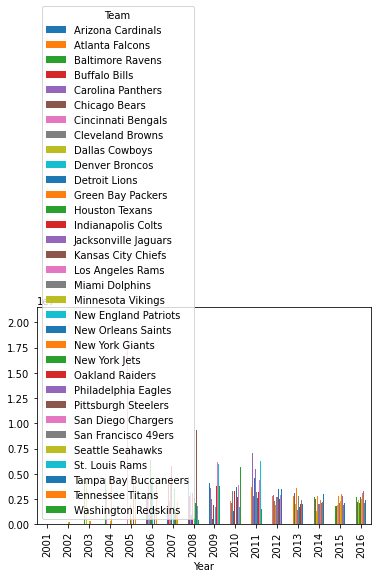

In [346]:
#NFL
nflTemp = pd.DataFrame().assign(Name = nfl["Name"], Year = nfl["Year"], Team = nfl["Team"], Salary = nfl["Salary"])
nflTemp.sort_values(by = "Year", ascending = True, inplace = True)
nflTemp = nflTemp.astype({"Year": "int", "Salary": "int"})

nfl_cube = nflTemp.pivot_table(index = "Year", columns=["Team"], values = "Salary", aggfunc=np.mean)
nfl_cube.plot.bar()

nfl_table = (nflTemp.groupby(["Year", "Team"])).Salary.mean().round()
nfl_table.to_frame()

There is a wide and clear range between the average salary of different teams in the NFL.

Salary
Year Team                          
1999 Atlanta Hawks        2288286.0
     Boston Celtics       4118429.0
     Charlotte Hornets    3759167.0
     Chicago Bulls        3375000.0
     Cleveland Cavaliers  4252667.0
...                             ...
2016 San Antonio Spurs    6588139.0
     Toronto Raptors      7298322.0
     Two other teams      3508537.0
     Utah Jazz            5348213.0
     Washington Wizards   7372232.0

[553 rows x 1 columns]

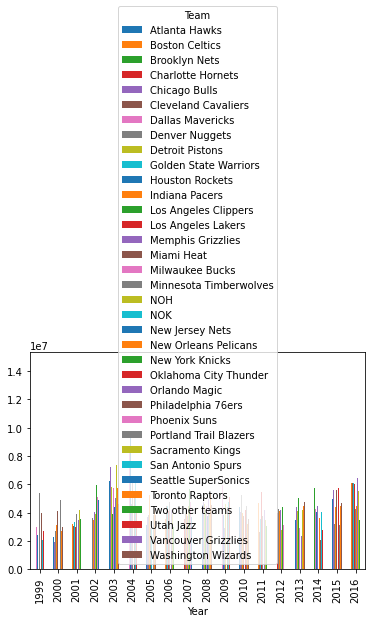

In [347]:
#NBA
nbaTemp = nba.loc[nba["Season"] >= 2001]
nbaTemp = nbaTemp.loc[nbaTemp["Season"] <= 2016]
nbaTemp = pd.DataFrame().assign(Name = nba["Name"], Year = nba["Season"], Team = nba["Team"], Salary = nba["Salary"])
nbaTemp.sort_values(by = "Year", ascending = True, inplace = True)
nbaTemp = nbaTemp.astype({"Year": "int", "Salary": "int"})

nba_cube = nbaTemp.pivot_table(index = "Year", columns=["Team"], values = "Salary", aggfunc=np.mean)
nba_cube.plot.bar()

nba_table = (nbaTemp.groupby(["Year", "Team"])).Salary.mean().round()
nba_table.to_frame()

There is a wide and clear range between the average salary of different teams in the NBA.

### Graph of average points per year by position for NBA

- **Title**: Average points per year by position in the NBA
- **Graph type**: Line graph
- **X-axis**: Year
- **Y-axis**: Average points
- **Description**: This graph shows the average points per year by position in the NBA.
- **Legend**: Each position in the NBA

##### Comments on the graphs

### Graph of average goals per year by position for NHL

- **Title**: Average goals per year by position in the NHL
- **Graph type**: Line graph
- **X-axis**: Year
- **Y-axis**: Average Goals
- **Description**: This graph shows the average goals per year by position in the NHL.
- **Legend**: Each position in the NHL

##### Comments on the graphs

### Graph of average total touch downs per year by position for NFL

- **Title**: Average total touch downs per year by position in the NFL
- **Graph type**: Line graph
- **X-axis**: Year
- **Y-axis**: Average total touch downs
- **Description**: This graph shows the average total touch downs per year by position in the NFL.
- **Legend**: Each position in the NFL

In [348]:
# Will need to make a new column called total tds and then add all the types of tds together
# Combine TD Passes, Rushing TDs, Receiving TDs, Ints for TDs, Fumble Return TDs, Returns for TDs_x, Returns for TDs_y, TDs Returned on Punt

##### Comments on the graphs

## Data Analysis Using Machine Learning

### Question 1: What is the best model to predict the salary of a player in the NHL, NBA, and NFL?

'The model predicts that a QB who has played 10 games will roughly make: [5856786.]'

'The actual average salary of a QB who has played 10 games is: 6502544.0'

<AxesSubplot:>

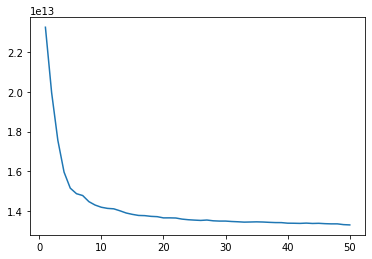

In [365]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

nflModel = pd.DataFrame().assign(gamesPlayed = nfl["Games Played"], Position = nfl["Position"])
nflModel.sort_values(by = "gamesPlayed", ascending = True, inplace = True)
nflModel = nflModel.astype({"gamesPlayed": "int"})
features = ["Games Played", "Position"]

X_dict = nfl[features].to_dict(orient="records")

X_train_dict = nfl[features].to_dict(orient="records")
X_new_dict = [{
    "Games Played": 10,
    "Position": "QB"
}]

y = nfl["Salary"]
y_train = nfl["Salary"]
y_train = y_train.astype({"Salary": "int"})
y = y .astype({"Salary": "int"})


# Dummy encoding
vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)
X_new = vec.transform(X_new_dict)

# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_new_sc = scaler.transform(X_new)

# # K-Nearest Neighbors Model
model = KNeighborsRegressor(n_neighbors=30)
model.fit(X_train_sc, y_train)
display("The model predicts that a QB who has played 10 games will roughly make: %s" % model.predict(X_new_sc).round())

#Compare results
nflVerify = nfl.loc[nfl["Position"] == "QB"]
nflVerify = nflVerify.loc[nflVerify["Games Played"] == 10]
nflVerify = nflVerify.astype({"Salary": "int"})
res = nflVerify.Salary.mean().round()
display("The actual average salary of a QB who has played 10 games is: %s" % res)

#Calculates estimate of test error based on 10-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y, 
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse
    
ks = pd.Series(range(1, 51))
ks.index = range(1, 51)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()

### Question 2: What is the best model to predict the points, goals, or touch downs of a player in the NBA, NHL, and NFL respectively?